# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**


In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [2]:
! pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.0 MB/s eta 0:00:00a 0:00:01
  Using cached xgboost-1.7.3-py3-none-manylinux2014_x86_64.whl (193.6 MB)


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [10]:
df = pd.read_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df=df.dropna()

In [11]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [12]:
# Examine X dimension
X.shape

(2056, 881)

In [13]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2056, 132)

In [14]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [15]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [04:01<00:00,  5.75s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 45%|████▌     | 19/42 [00:18<00:22,  1.02it/s]


KeyboardInterrupt: 

In [16]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.80,0.81,0.68,0.11
ExtraTreeRegressor,0.80,0.81,0.68,0.08
ExtraTreesRegressor,0.80,0.81,0.68,2.20
GaussianProcessRegressor,0.80,0.81,0.68,1.28
XGBRegressor,0.78,0.80,0.71,0.97
RandomForestRegressor,0.74,0.77,0.77,1.86
BaggingRegressor,0.72,0.74,0.80,0.21
MLPRegressor,0.64,0.67,0.91,5.98
HistGradientBoostingRegressor,0.61,0.64,0.95,1.52


In [17]:
# Performance table of the test set (20% subset)
predictions_test

NameError: name 'predictions_test' is not defined

## **5. Data visualization of model performance**

[(0.0, 1.0)]

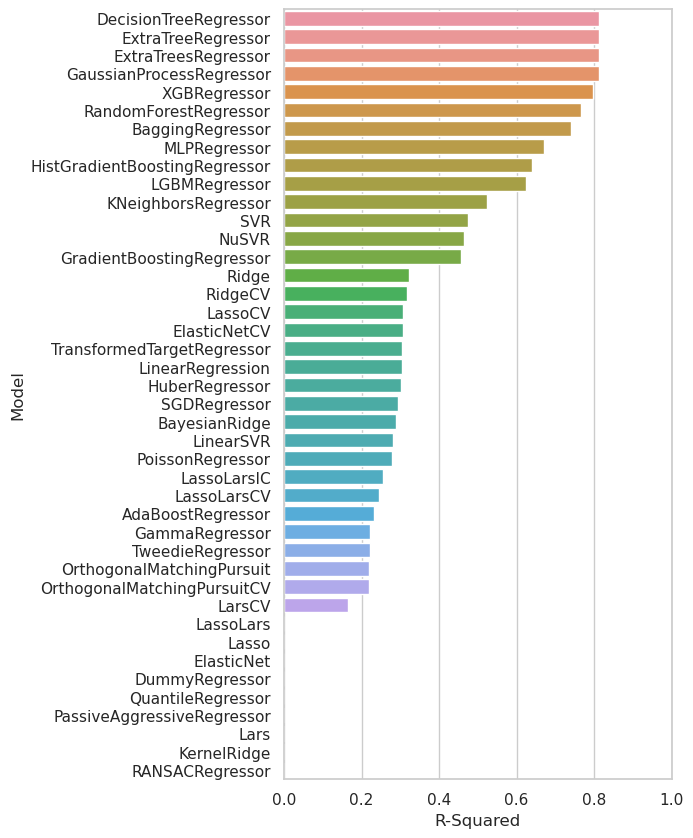

In [18]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

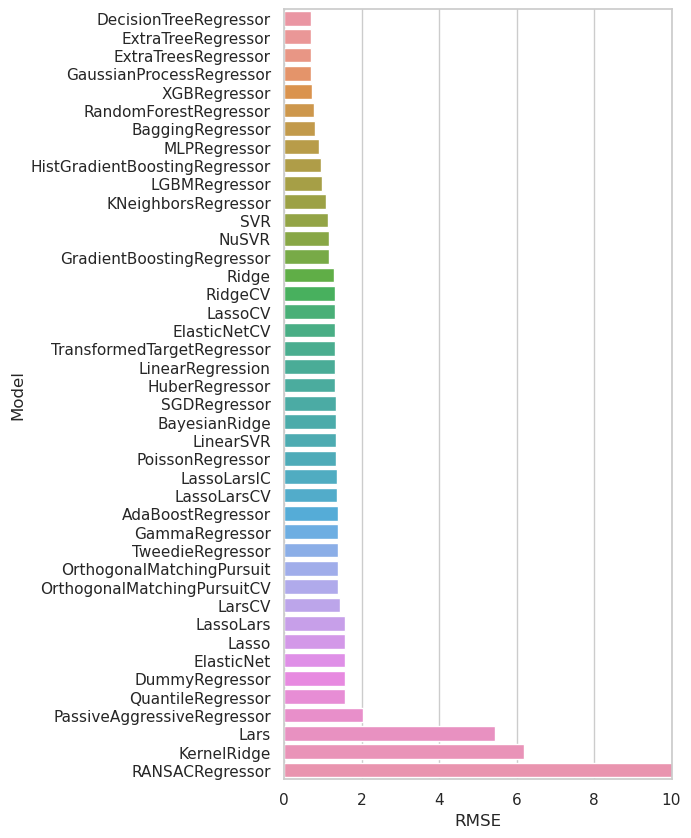

In [19]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

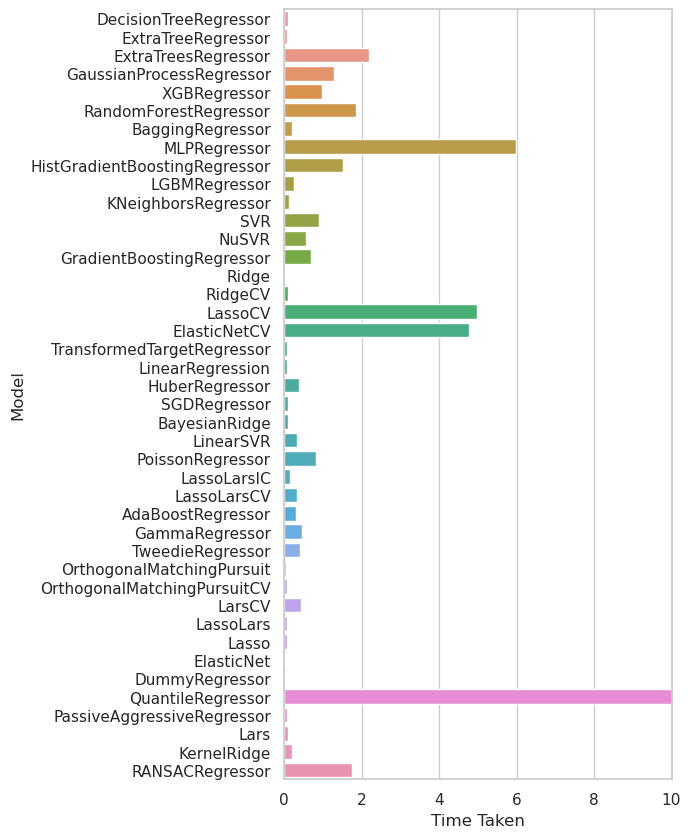

In [20]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))